## req -> 파이썬에서 브라우저의 역할을 대신해주는 라이브러리
- 단축키 팁 : Tab을 눌러 자동완성

In [2]:
import requests as req

#### 1. req를 통해서 네이버 페이지 정보를 요청
#### 2. response => 응답 코드를 넘겨받는다
- 200,300 => 통신에 성공했어요
- 40x => 클라이언트 요청의 문제가 있다 (front)
- 50x => 서버의 문제가 있다 (back - server,db)

In [3]:
# 멜론 => 406으로 요청의 문제가 있다. (우리잘못아님)
# 사람이 하는척 속이면 되지 않을까
res = req.get('https://www.melon.com/')
res

<Response [406]>

In [4]:
res.text

''

## * 406 => User-Agent 정보가 없기 때문에
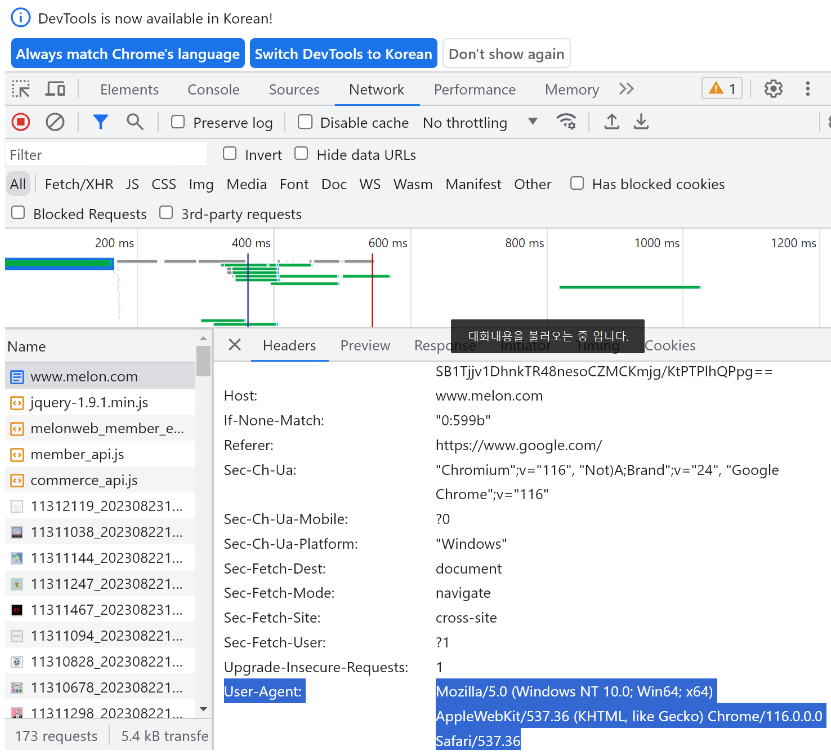

In [5]:
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

In [6]:
# headers 값을 줘서 요청 성공
req.get('https://www.melon.com/', headers=head)

<Response [200]>

### 뉴스타이틀 수집

In [7]:
# 1. 네이버 사이트 (검색한 뉴스화면)를 요청
# String 타입
res = req.get('https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%98%A4%EC%97%BC%EC%88%98+%EB%B0%A9%EB%A5%98')
# res.text

## BeautifulSoup
- req를 통해서 받아온 텍스트 데이터를 컴퓨터가 이해할 수 있는 html 형태로 변환

In [8]:
# 주의할 점: stone이 아니 일반 soup을 임포트해야한다.
from bs4 import BeautifulSoup as bs

In [9]:
# 2. 응답을 받은 데이터에서 뉴스 타이틀만 수집
# html 타입
soup = bs(res.text, "lxml")

In [10]:
# select("선택자") => html데이터에서 특정 요소만 수집
# a 태그 중 news_tit만 수집
title = soup.select("a.news_tit")

### 요소(Element) : 태그 + 컨텐츠
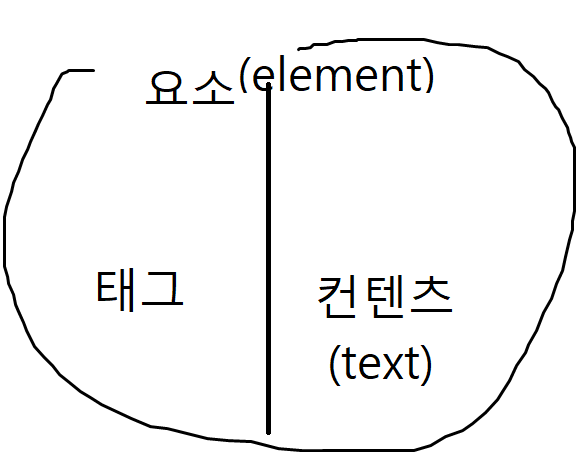

In [11]:
# 수집된 요소 중에 컨텐츠(텍스트)데이터만 추출
title[3].text

'"오늘 낮 1시 오염수 방류"…연내 3만 톤 넘게 바다로'

In [12]:
for i in title:
    print(i.text)

후쿠시마 오염수 오늘 방류 개시…일본언론 '오후 1시' 예상
오늘 오후 1시쯤 오염수 방류…IAEA "기준 부합 여부 평가"
“일본 후쿠시마 오염수 방류, 내일 오후 1시 시작 조율중”
"오늘 낮 1시 오염수 방류"…연내 3만 톤 넘게 바다로
주일美대사, 日오염수 방류계획에 "지지"…31일 후쿠시마 방문
日 오염수 내일부터 방류…서울시 "모든 수산물 매일 표본조사"
기시다, 오늘 13시 오염수 방류…日어민 “이미 수출길 다 막혔다”
日 후쿠시마 오염수 방류 ‘D데이’…안전성 논란과 남은 과제는
日오염수 내일부터 방류…"일본산 식품, 계속 수입금지"
아직은 큰 변동없는 수산물가격…'오염수 방류' 영향에 촉각


##### ex) 네이버 금융 정보 수집

In [13]:
#1. req를 통해서 url 정보를 요청
res = req.get('https://finance.naver.com/')

In [14]:
#2. 응답데이터가 올바르다면 bs를 통해서 html형태로 변형
soup = bs(res.text, "lxml")

In [15]:
#3. 변형된 데이터에서 필요한 태그만 수집
# 팁! 부모자식을 의미하는 자식선택자를 잘 활용
title = soup.select("#_topItems1>tr>th>a")
title[1].text

'우리로'

In [16]:
for i in title:
    print(i.text)

KODEX 200선물인버스2X
우리로
테라사이언스
KODEX 코스닥150선물인버스
인산가
나인테크
폴라리스오피스
드림시큐리티
시노펙스
디알텍
코리아나
큐렉소
KODEX 레버리지
스마트레이더시스템
삼부토건


# ** 선택자 찾기 꿀팁
- 요소 우클릭 -> copy -> copyselector
- 주의점! 반드시 내가 선택한 하나만 가지고 온다.
- 복수개가 필요한 경우에는 선택자를 수정(ex. nth-child())
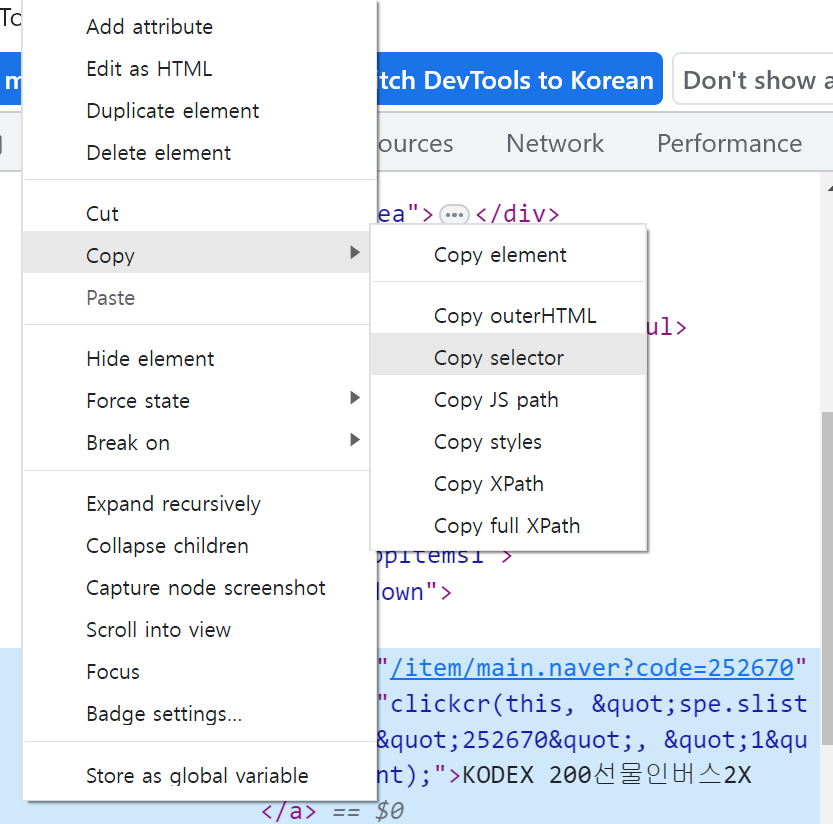


### #_topItems1 > tr:nth-child(1) > th > a
## 가상클래스 선택자 =>:nth-child(숫자) 